In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv("bank-full.csv", sep=";")
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


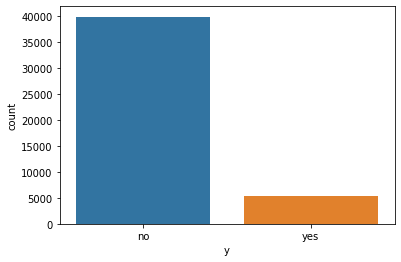

In [ ]:
sns.countplot(x='y',data=dataset)

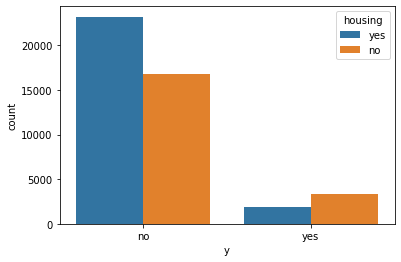

In [ ]:
sns.countplot(x='y',data = dataset,hue='housing')

In [ ]:
dataset = dataset.replace(to_replace = ['yes','no'],value = ['1','0'])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
dataset.drop(['job','marital','education','default','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome'],axis=1,inplace=True)
dataset

,age,balance,y
0,58,2143,0
1,44,29,0
2,33,2,0
3,47,1506,0
4,33,1,0
...,...,...,...
45206,51,825,1
45207,71,1729,1
45208,72,5715,1
45209,57,668,0


In [ ]:
from sklearn.model_selection import train_test_split
x=dataset.drop('y',axis=1)
y=dataset['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
print(x_train)

       age  balance
33362   39     3870
28229   31     1073
37952   36      886
43408   19      394
9897    45        0
...    ...      ...
30403   35      995
21243   35      750
42613   35      323
43567   70      616
2732    46       57

[33908 rows x 2 columns]


In [ ]:
print(x_test)

       age  balance
14001   37     1403
32046   36     -253
13318   47     -406
42991   57      501
14237   33     -406
...    ...      ...
9953    37     3913
37898   36     -267
1080    37        0
17950   41      636
20575   49     4751

[11303 rows x 2 columns]


In [ ]:
print(y_train)

33362    0
28229    0
37952    0
43408    1
9897     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 33908, dtype: object


In [ ]:
print(y_test)

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
9953     0
37898    0
1080     0
17950    0
20575    1
Name: y, Length: 11303, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
print(x_train)

[[-0.18276354  0.80402975]
 [-0.93754659 -0.09711178]
 [-0.46580719 -0.15735971]
 ...
 [-0.56015507 -0.33874787]
 [ 2.74202077 -0.2443487 ]
 [ 0.47767162 -0.42444813]]


In [ ]:
print(x_test)

[[-0.3714593   0.0092081 ]
 [-0.46580719 -0.52432439]
 [ 0.5720195  -0.57361815]
 ...
 [-0.3714593  -0.44281248]
 [ 0.00593222 -0.23790507]
 [ 0.76071527  1.08787161]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(x_test)
dataset1=pd.DataFrame({'Data Aktual Deposito':y_test,'Data Prediksi Deposito':y_pred})
dataset1

,Data Aktual Deposito,Data Prediksi Deposito
14001,0,0
32046,1,0
13318,0,0
42991,0,0
14237,0,0
...,...,...
9953,0,0
37898,0,0
1080,0,0
17950,0,0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      9978
           1       0.20      0.04      0.06      1325

    accuracy                           0.87     11303
   macro avg       0.54      0.51      0.50     11303
weighted avg       0.80      0.87      0.83     11303



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[9786  192]
 [1276   49]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


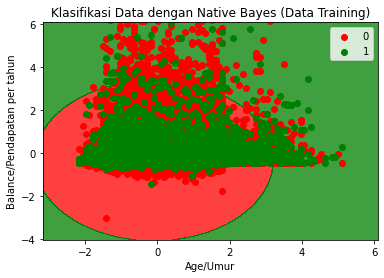

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Native Bayes (Data Training)')
plt.xlabel('Age/Umur')
plt.ylabel('Balance/Pendapatan per tahun')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


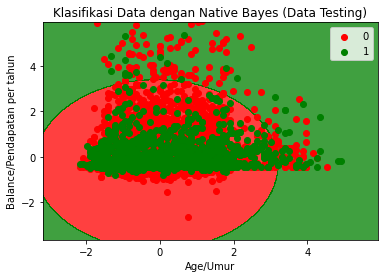

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Native Bayes (Data Testing)')
plt.xlabel('Age/Umur')
plt.ylabel('Balance/Pendapatan per tahun')
plt.legend()
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred)*100)

87.01229762010085
